In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import time
import sklearn.metrics as skmetrics

import warnings                               
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('train.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

In [5]:
df.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,77202.000000,76306.000000,50518.000000,33920.000000,33837.000000,33837.000000,50520.000000,50532.000000,50528.000000,50546.000000,50553.000000,50410.000000,50498.000000,56778.000000,77160.000000,50522.000000,5.073600e+04,56778.000000,76894.000000
mean,744.836678,28.393400,43.804575,3.099613,3.560774,3.560774,66.829573,58.949860,1286.548883,76.681186,76.027010,37.148869,39.192416,197.607334,107.738430,11.543193,2.655013e+03,197.607334,6.520157
std,597.080992,4.111239,5.005754,11.186776,11.088078,11.088078,8.903321,5.799489,337.937345,22.248327,22.305870,4.749887,5.301538,89.443680,118.555818,3.017004,3.993064e+05,89.443680,2.393391
min,0.000000,0.000000,0.000000,-1.960466,-2.406213,-2.406213,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-74.684579,0.000000,0.000000e+00,0.000000,0.000000
25%,225.710444,25.430483,40.492248,-0.980198,-0.470198,-0.470198,61.584915,55.568637,1030.824467,59.595693,58.817215,33.992146,35.437500,146.500000,0.486521,9.245862,2.000000e+00,146.500000,4.694603
50%,556.135900,27.999622,43.738314,-0.162421,0.335752,0.335752,66.554187,58.155294,1232.438645,69.583402,68.856606,37.003815,39.168839,182.000000,62.479894,11.052013,2.000000e+00,182.000000,6.109133
75%,1279.882107,31.166240,47.769240,2.441508,2.869483,2.869483,72.938827,62.670039,1597.434570,92.948847,92.455666,40.597600,42.820115,275.500000,181.533348,14.326435,2.000000e+00,275.500000,7.959781
max,1779.032433,41.809714,55.088655,89.027520,88.915344,88.915344,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,53.768750,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 77202 entries, 2018-01-01 06:20:00+00:00 to 2020-03-15 23:50:00+00:00
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ActivePower                   77202 non-null  float64
 1   AmbientTemperatue             76306 non-null  float64
 2   BearingShaftTemperature       50518 non-null  float64
 3   Blade1PitchAngle              33920 non-null  float64
 4   Blade2PitchAngle              33837 non-null  float64
 5   Blade3PitchAngle              33837 non-null  float64
 6   GearboxBearingTemperature     50520 non-null  float64
 7   GearboxOilTemperature         50532 non-null  float64
 8   GeneratorRPM                  50528 non-null  float64
 9   GeneratorWinding1Temperature  50546 non-null  float64
 10  GeneratorWinding2Temperature  50553 non-null  float64
 11  HubTemperature                50410 non-null  float64
 12  MainBoxTemper

In [6]:
total_na = df['ActivePower'].isna().sum()
total_na

0

---

<Axes: xlabel='Datetime'>

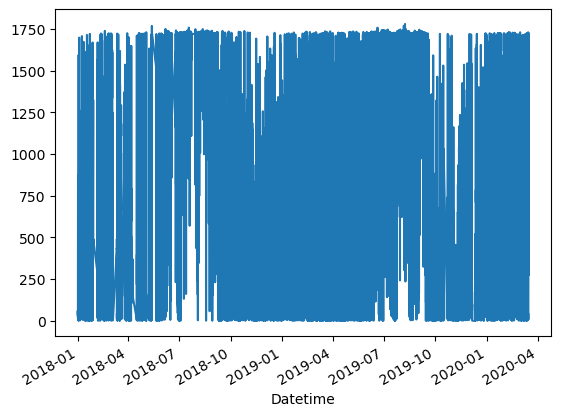

In [7]:
# Power output 
df['ActivePower'].plot()

### **Resampling to daily & Clean the data**

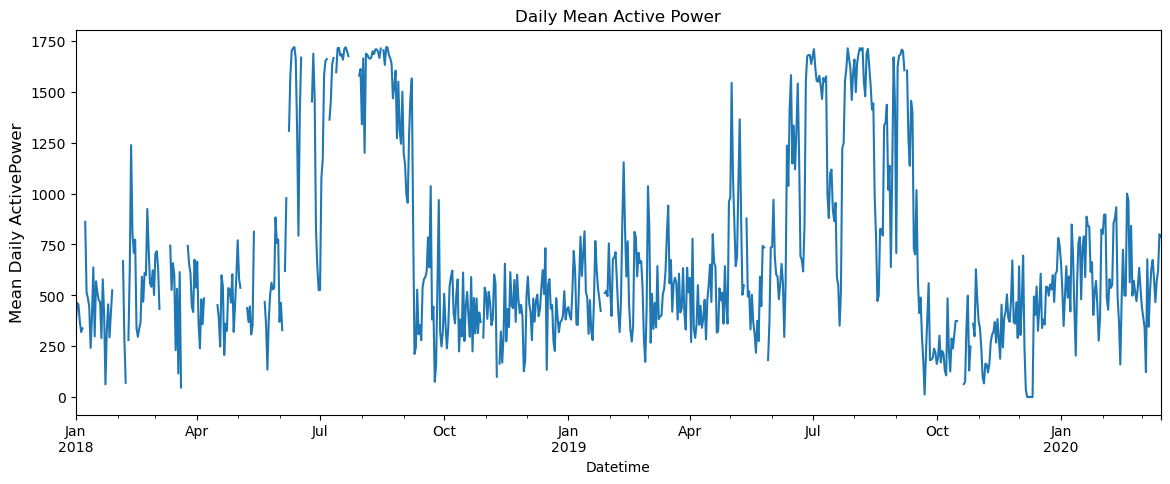

In [ ]:
# Resampling daily
df_copy = df.copy()

df_copy['ActivePower'].resample('D').mean().plot(figsize=(14, 5))

plt.ylabel('Mean Daily ActivePower', fontsize=12)
plt.title('Daily Mean Active Power')
plt.show()

In [ ]:
df_daily = pd.DataFrame(df['ActivePower'].resample('D').mean())
df_daily

,ActivePower
Datetime,
2018-01-01 00:00:00+00:00,366.223561
2018-01-02 00:00:00+00:00,462.550740
2018-01-03 00:00:00+00:00,454.417752
2018-01-04 00:00:00+00:00,369.952190
2018-01-05 00:00:00+00:00,319.446595
...,...
2020-03-11 00:00:00+00:00,466.289248
2020-03-12 00:00:00+00:00,570.315539
2020-03-13 00:00:00+00:00,619.637333


In [ ]:
zero_power_count = (df_daily == 0).sum()
null_counts = df_daily.isnull().sum()

zero_power_count, null_counts


(ActivePower    4
 dtype: int64,
 ActivePower    71
 dtype: int64)

In [ ]:
# Drop null and zero value
df_daily = df_daily[df_daily != 0]
df_daily.dropna(inplace=True)
df_daily

,ActivePower
Datetime,
2018-01-01 00:00:00+00:00,366.223561
2018-01-02 00:00:00+00:00,462.550740
2018-01-03 00:00:00+00:00,454.417752
2018-01-04 00:00:00+00:00,369.952190
2018-01-05 00:00:00+00:00,319.446595
...,...
2020-03-11 00:00:00+00:00,466.289248
2020-03-12 00:00:00+00:00,570.315539
2020-03-13 00:00:00+00:00,619.637333


In [ ]:
# Reset the index to start from 1 & Drop "Datetime"
df_daily = df_daily.reset_index()
df_daily.index = range(1, len(df_daily) + 1)
df_daily.drop(columns=['Datetime'], inplace=True)

df_daily

,ActivePower
1,366.223561
2,462.550740
3,454.417752
4,369.952190
5,319.446595
...,...
726,466.289248
727,570.315539
728,619.637333
729,800.312824


In [ ]:
history = pd.DataFrame(df_daily['ActivePower'])
history

,ActivePower
1,366.223561
2,462.550740
3,454.417752
4,369.952190
5,319.446595
...,...
726,466.289248
727,570.315539
728,619.637333
729,800.312824


---
### Plots

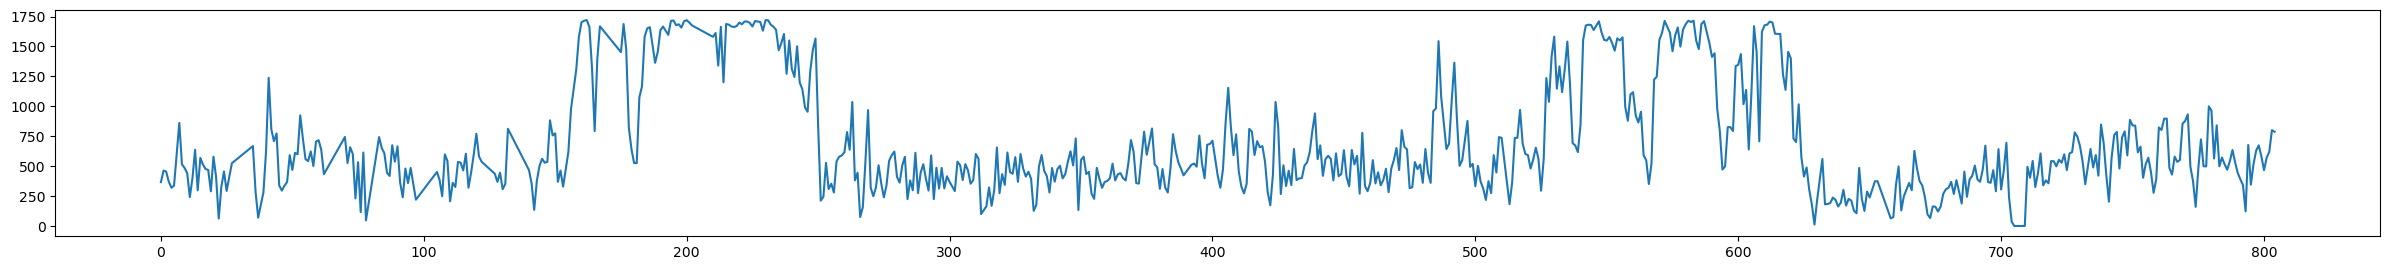

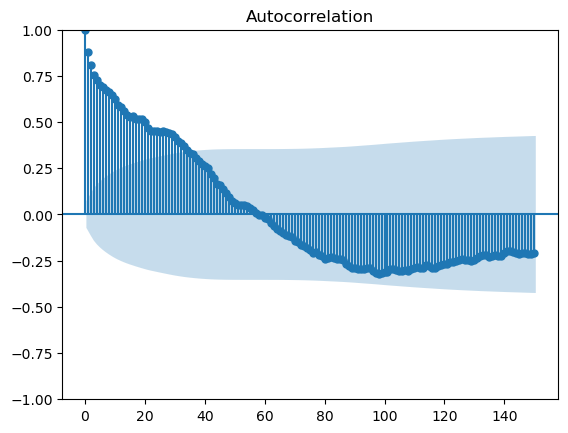

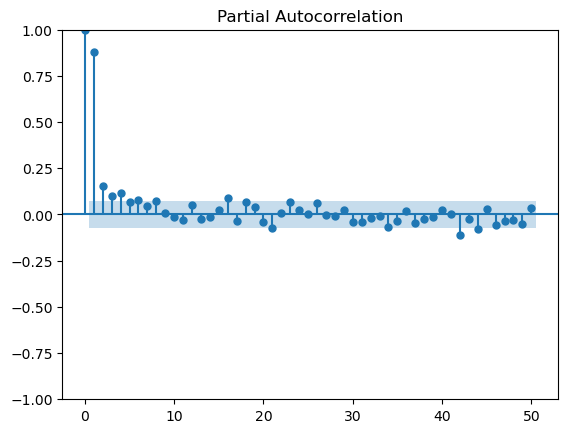

In [ ]:
#visualize the data
plt.figure(figsize=(30, 10))
plt.subplot(3,1,1)

plt.plot(df_daily['ActivePower'])
plt.show()

plot_acf(df_daily['ActivePower'],lags=150)
plt.show()

plot_pacf(df_daily['ActivePower'],lags=50)
plt.show()

---
### ARIMA

Further evidence of the seasonal nature of the data set can be seen using the seasonal decompose function and setting the period = to 31 (a month)

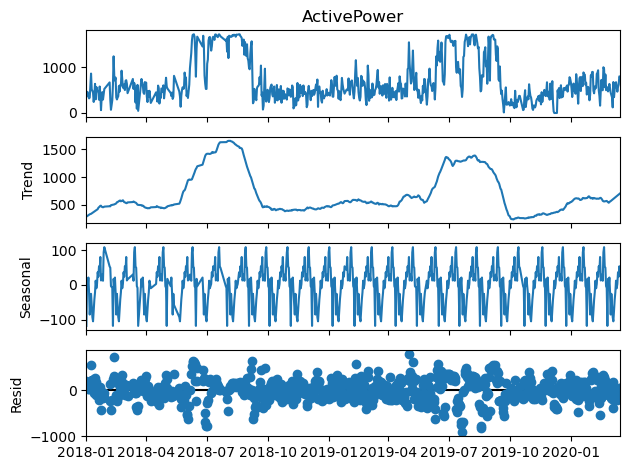

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# decompase into seasonal/trend/residual
result = seasonal_decompose(df_daily['ActivePower'].dropna(), period=31, model='additive',extrapolate_trend=True)
result.plot()
plt.show()

In [120]:
def evaluate_models_cv(dataset, p_values, d_values, q_values, P_values, D_values, Q_values, m):
    K = 5
    result = []
    best_rmse, best_cfg = float("inf"), None
    start_time = time.time()  # Record the start time of the entire process

    for p in p_values:
        for d in d_values:
            for q in q_values:
                for P in P_values:
                    for D in D_values:
                        for Q in Q_values:
                            trend_order = (p, d, q)
                            seasonal_order = (P, D, Q, m)
                            cfg = [(p, d, q), (P, D, Q, m)]
                            validation_size = 15
                            train_size = len(dataset) - validation_size * K
                            rmse = 0

                            for k in range(K):
                                iteration_start_time = time.time()  # Record the start time of each iteration

                                try:
                                    train, test = dataset[0:train_size + k * validation_size], dataset[train_size + k * validation_size:train_size + (k + 1) * validation_size]
                                    model = ARIMA(train, order=trend_order, seasonal_order=seasonal_order)
                                    model_fit = model.fit()
                                    predictions = model_fit.forecast(validation_size)
                                    rmse += np.sqrt(skmetrics.mean_squared_error(test, predictions))
                                except Exception as e:
                                    continue

                                if time.time() - iteration_start_time > 1:  # Check if iteration time exceeds 2 seconds
                                    break
                                
                                if time.time() - start_time > 300:  # Check if total time exceeds 5 minutes
                                    print('Best SARIMA%s RMSE=%.3f' % (best_cfg, best_rmse))
                                    return best_cfg, best_rmse  # Return the best configuration and RMSE found so far

                            rmse_avg = rmse / K
                            result.append((cfg, rmse_avg))
                            if rmse_avg < best_rmse:
                                best_rmse, best_cfg = rmse_avg, cfg
                                print('ARIMA%s RMSE=%.3f' % (cfg, rmse_avg))

    print('Best SARIMA%s RMSE=%.3f' % (best_cfg, best_rmse))
    return best_cfg, best_rmse

In [130]:
p = range(0, 5)
d = range(0, 2)
q = range(0, 5)
P = range(0, 5)
D = range(0, 2)
Q = range(0, 5)
m = 12

evaluate_models_cv(history, p,d,q,P,D,Q,m)

ARIMA[(0, 0, 0), (0, 0, 0, 12)] RMSE=219.545
ARIMA[(0, 0, 0), (0, 0, 3, 12)] RMSE=37.079
ARIMA[(0, 0, 0), (0, 0, 4, 12)] RMSE=36.446
ARIMA[(0, 0, 0), (2, 1, 4, 12)] RMSE=36.244
ARIMA[(0, 0, 0), (3, 1, 3, 12)] RMSE=36.196
ARIMA[(0, 0, 0), (3, 1, 4, 12)] RMSE=32.528
Best SARIMA[(0, 0, 0), (3, 1, 4, 12)] RMSE=32.528


([(0, 0, 0), (3, 1, 4, 12)], 32.52783483314585)

In [131]:

model = ARIMA(history,order=(0, 0, 0),seasonal_order=(3, 1, 4, 12)).fit()

pred = model.forecast(15)
pred = pd.DataFrame(pred)
pred

,predicted_mean
731,627.317832
732,851.400778
733,624.536988
734,649.044248
735,732.621353
736,737.790005
737,654.263800
738,689.129506
739,722.041891
740,721.620882


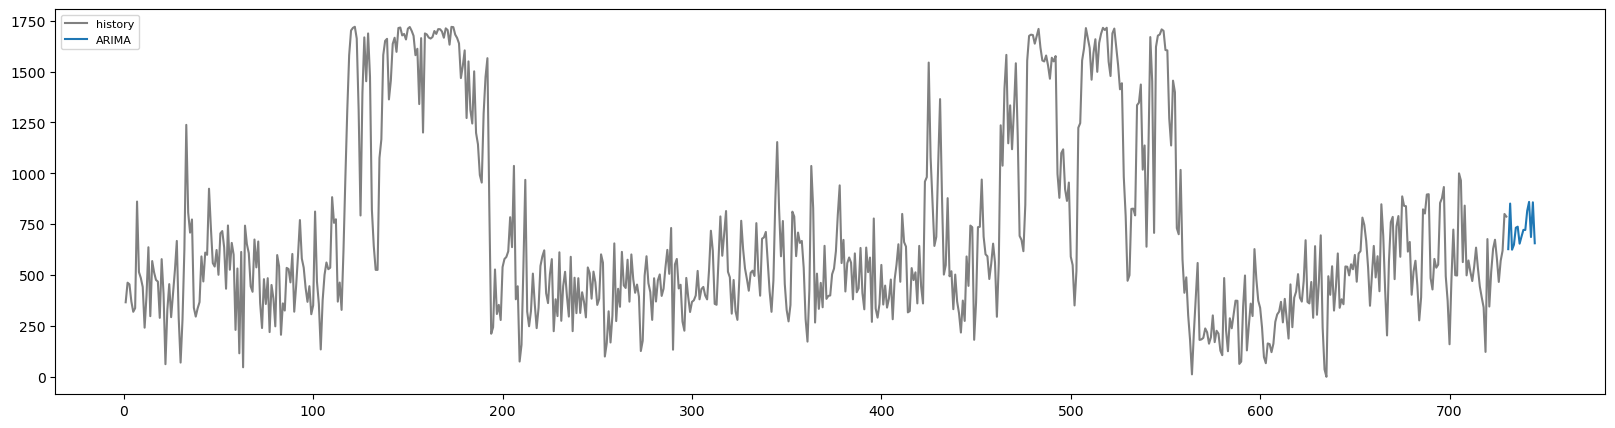

In [132]:
plt.subplots(figsize=(20,5))
plt.plot(history, label='history', color='grey' )
plt.plot(pred, label='ARIMA')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [133]:
test = pd.read_csv('test1.csv')
test1 = test.drop(columns='index')

new_index = range(731, 731+15)
test1.index = new_index
test1

,ActivePower
731,644.891382
732,857.485779
733,367.360814
734,629.455480
735,485.411496
736,432.529893
737,481.172384
738,552.187880
739,425.815287
740,754.076163


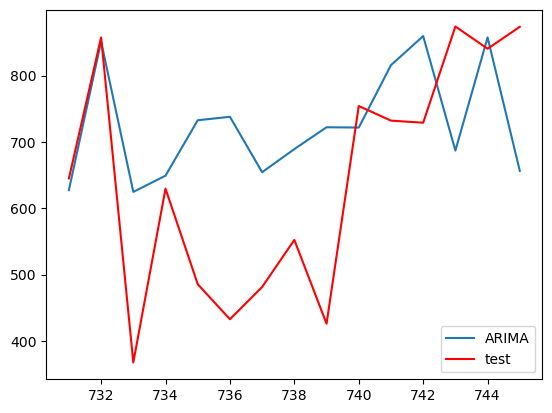

In [136]:
plt.plot(pred, label='ARIMA')
plt.plot(test1, label='test', color ='red')
plt.legend()


--- 
### Holt-Winters ETS

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_1 = ExponentialSmoothing(df_daily['ActivePower'], trend="add", seasonal="add", seasonal_periods=12, damped_trend=False).fit()
model_2 = ExponentialSmoothing(df_daily['ActivePower'], trend="add", seasonal="add", seasonal_periods=12, damped_trend=True).fit()
model_3 = ExponentialSmoothing(df_daily['ActivePower'], trend="add", seasonal="mul", seasonal_periods=12, damped_trend=True).fit()

In [ ]:
#len(test) =15
pred_1 = pd.DataFrame(model_1.forecast(15))
pred_2 = pd.DataFrame(model_2.forecast(15))
pred_3 = pd.DataFrame(model_3.forecast(15))

In [ ]:
history = pd.DataFrame(df_daily['ActivePower'])
history

,ActivePower
1,366.223561
2,462.550740
3,454.417752
4,369.952190
5,319.446595
...,...
726,466.289248
727,570.315539
728,619.637333
729,800.312824


In [ ]:
test = pd.read_csv('test1.csv')
test1 = test.drop(columns='index')

new_index = range(731, 731+15)
test1.index = new_index
test1

,ActivePower
731,644.891382
732,857.485779
733,367.360814
734,629.455480
735,485.411496
736,432.529893
737,481.172384
738,552.187880
739,425.815287
740,754.076163


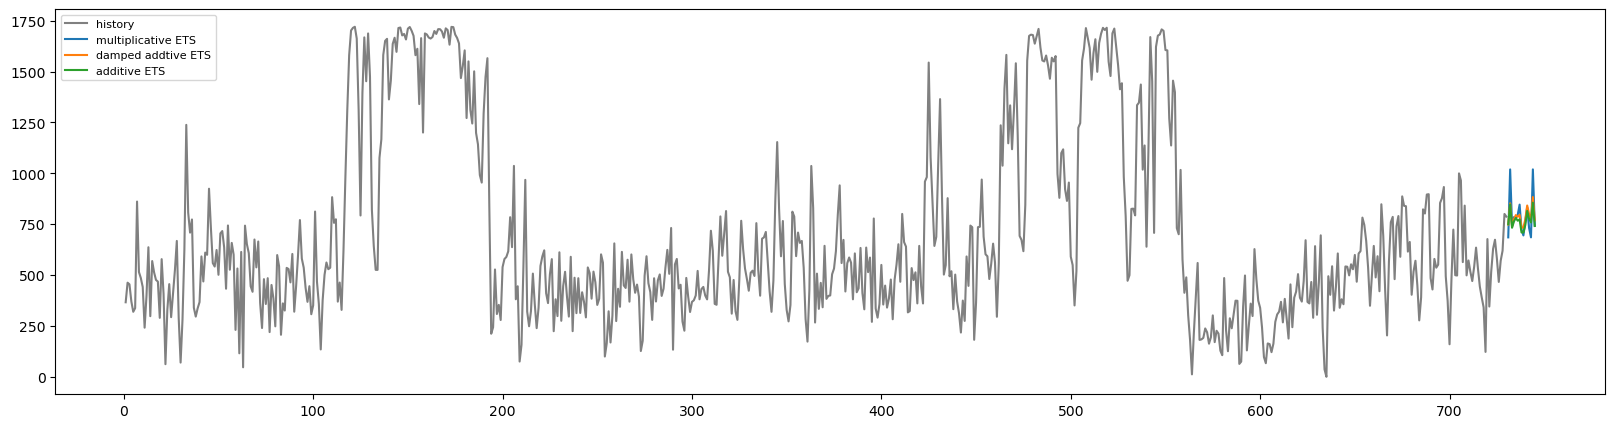

In [ ]:
plt.subplots(figsize=(20,5))
plt.plot(history, label='history', color='grey' )
plt.plot(pred_3, label='multiplicative ETS')
plt.plot(pred_2, label='damped addtive ETS')
plt.plot(pred_1, label='additive ETS')
plt.legend(loc='upper left', fontsize=8)
plt.show()

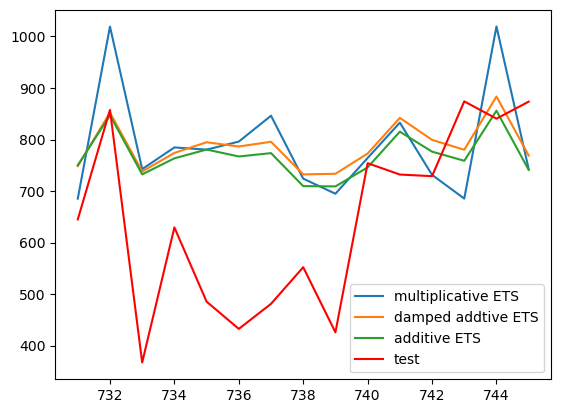

In [ ]:
plt.plot(pred_3, label='multiplicative ETS')
plt.plot(pred_2, label='damped addtive ETS')
plt.plot(pred_1, label='additive ETS')
plt.plot(test1, label='test', color = 'red')
plt.legend()


---
### Theta model

In [ ]:
import pandas as pd
from statsmodels.tsa.forecasting.theta import ThetaModel

# Load data and set 'Datetime' as index
df = pd.read_csv('train.csv')
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.set_index('Datetime', inplace=True)

# Resample to get daily mean
df_daily = df['ActivePower'].resample('D').mean()

# Check for continuous date range and fill any missing dates with NaN
df_daily = df_daily.asfreq('D')

# Filter out zeros and drop NaN values
df_daily = df_daily[df_daily != 0].dropna()

# Check if the index is continuous
if pd.infer_freq(df_daily.index) is None:
    period = 365 
    model_4 = ThetaModel(df_daily, period=period)
else:
    model_4 = ThetaModel(df_daily)

# Fit and forecast
res = model_4.fit()
pred = res.forecast(15)

print(pred)


731     766.432190
732     503.975245
733     696.351955
734     514.646415
735     969.201923
736     576.470251
737     597.135831
738     600.454528
739     759.409169
740     803.688549
741     932.192219
742    1200.900688
743    1418.210029
744     842.850789
745    1014.724903
Name: forecast, dtype: float64


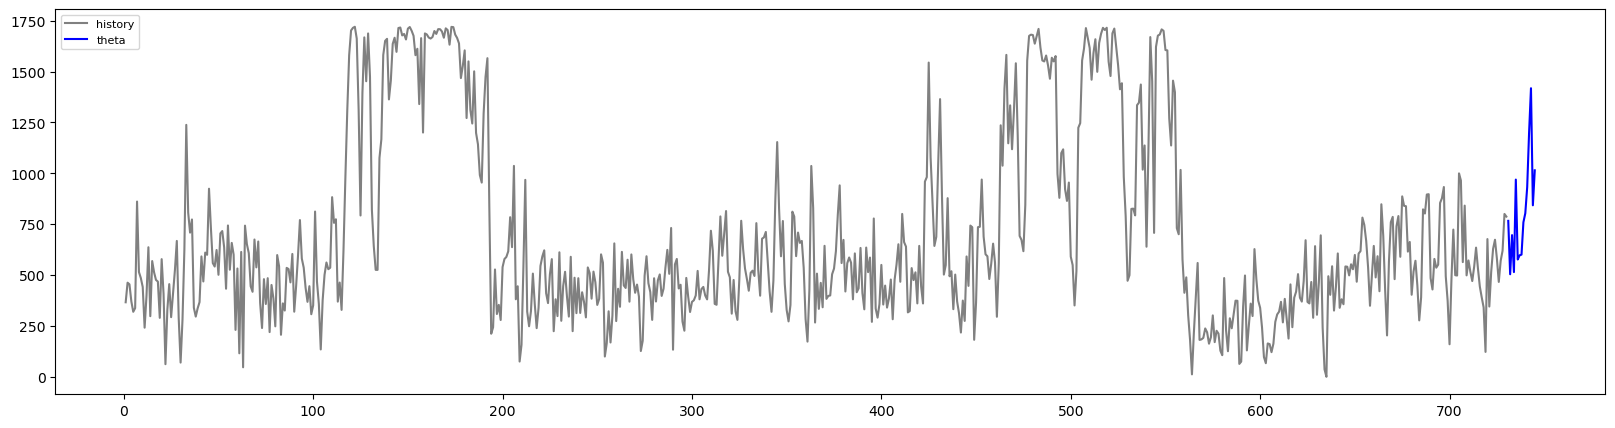

In [ ]:
plt.subplots(figsize=(20,5))
plt.plot(history, label='history', color='grey' )
plt.plot(pred, label='theta', color='blue')
plt.legend(loc='upper left', fontsize=8)
plt.show()


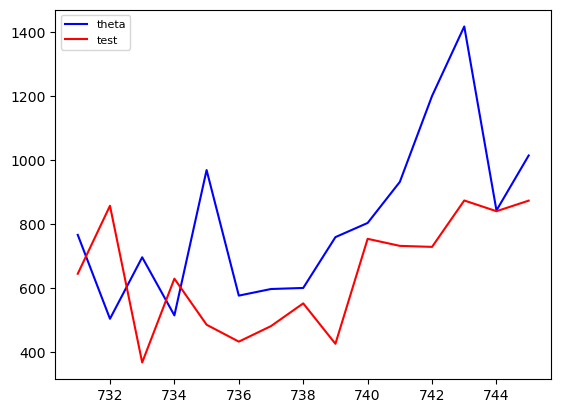

In [ ]:
plt.plot(pred, label='theta', color='blue')
plt.plot(test1, label='test', color ='red')
plt.legend(loc='upper left', fontsize=8)
plt.show()